In [1]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 30.2 MB/s eta 0:00:00


In [2]:
from faker import Faker
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Initialize Faker to generate synthetic data
fake = Faker()

In [4]:
# Generate synthetic sales data
def generate_sales_data(num_records):
    sales_data = []
    for _ in range(num_records):
        customer_name = fake.name()
        product_name = fake.word()
        quantity = random.randint(1, 10)
        price = round(random.uniform(10, 1000), 2)
        date = fake.date_between(start_date='-1y', end_date='today')
        sales_data.append([customer_name, product_name, quantity, price, date])
    return sales_data

In [5]:
# Generate synthetic customer data
def generate_customer_data(num_customers):
    customer_data = []
    for _ in range(num_customers):
        customer_name = fake.name()
        age = random.randint(18, 70)
        gender = random.choice(['Male', 'Female'])
        email = fake.email()
        address = fake.address()
        customer_data.append([customer_name, age, gender, email, address])
    return customer_data

In [6]:
# Generate synthetic product data
def generate_product_data(num_products):
    product_data = []
    for _ in range(num_products):
        product_name = fake.word()
        category = fake.word()
        price = round(random.uniform(10, 1000), 2)
        product_data.append([product_name, category, price])
    return product_data

In [7]:
# Generate synthetic sales, customer, and product data
num_sales_records = 1000
num_customers = 200
num_products = 50

In [8]:
sales_data = generate_sales_data(num_sales_records)
customer_data = generate_customer_data(num_customers)
product_data = generate_product_data(num_products)

In [9]:
# Convert data to pandas DataFrame
sales_df = pd.DataFrame(sales_data, columns=['Customer Name', 'Product Name', 'Quantity', 'Price', 'Date'])
customer_df = pd.DataFrame(customer_data, columns=['Customer Name', 'Age', 'Gender', 'Email', 'Address'])
product_df = pd.DataFrame(product_data, columns=['Product Name', 'Category', 'Price'])

In [10]:
# Example of saving data to CSV files
sales_df.to_csv('sales_data.csv', index=False)
customer_df.to_csv('customer_data.csv', index=False)
product_df.to_csv('product_data.csv', index=False)

In [11]:
# Load synthetic data from CSV files
sales_df = pd.read_csv('sales_data.csv')
customer_df = pd.read_csv('customer_data.csv')
product_df = pd.read_csv('product_data.csv')

In [12]:
sales_df.head()

,Customer Name,Product Name,Quantity,Price,Date
0,Alan Durham,really,2,622.66,2023-03-14
1,Stacey Pitts,ten,6,169.11,2023-06-30
2,Jason Weber,positive,4,532.59,2023-11-05
3,James Henderson,this,7,813.24,2023-07-17
4,Phillip May,energy,8,921.98,2023-10-09


In [13]:
customer_df.head()

,Customer Name,Age,Gender,Email,Address
0,Angelica Clark,25,Male,garciacharles@example.org,"154 Luna Stream Apt. 049\nWest Pamela, VI 04137"
1,Jean Colon,51,Female,hutchinsonchristina@example.org,Unit 8715 Box 0095\nDPO AP 97623
2,Benjamin Robinson,58,Female,dana39@example.com,"404 Mccullough Harbor Apt. 908\nWest Amy, IA 2..."
3,Brandi Lloyd,22,Female,wrightchloe@example.net,7974 Hickman Street Suite 812\nEast Brucechest...
4,Tiffany Jackson,21,Female,wgiles@example.net,"7457 Smith Burg\nMurphyville, TN 96151"


In [14]:
product_df.head()

,Product Name,Category,Price
0,form,population,394.19
1,seem,smile,889.83
2,can,week,135.21
3,other,ahead,983.57
4,war,chair,715.01


# Sales Dataframe

In [15]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer Name  1000 non-null   object 
 1   Product Name   1000 non-null   object 
 2   Quantity       1000 non-null   int64  
 3   Price          1000 non-null   float64
 4   Date           1000 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 39.2+ KB


In [16]:
sales_df.dtypes

Customer Name     object
Product Name      object
Quantity           int64
Price            float64
Date              object
dtype: object

In [17]:
sales_df.isnull().sum()

Customer Name    0
Product Name     0
Quantity         0
Price            0
Date             0
dtype: int64

<Axes: >

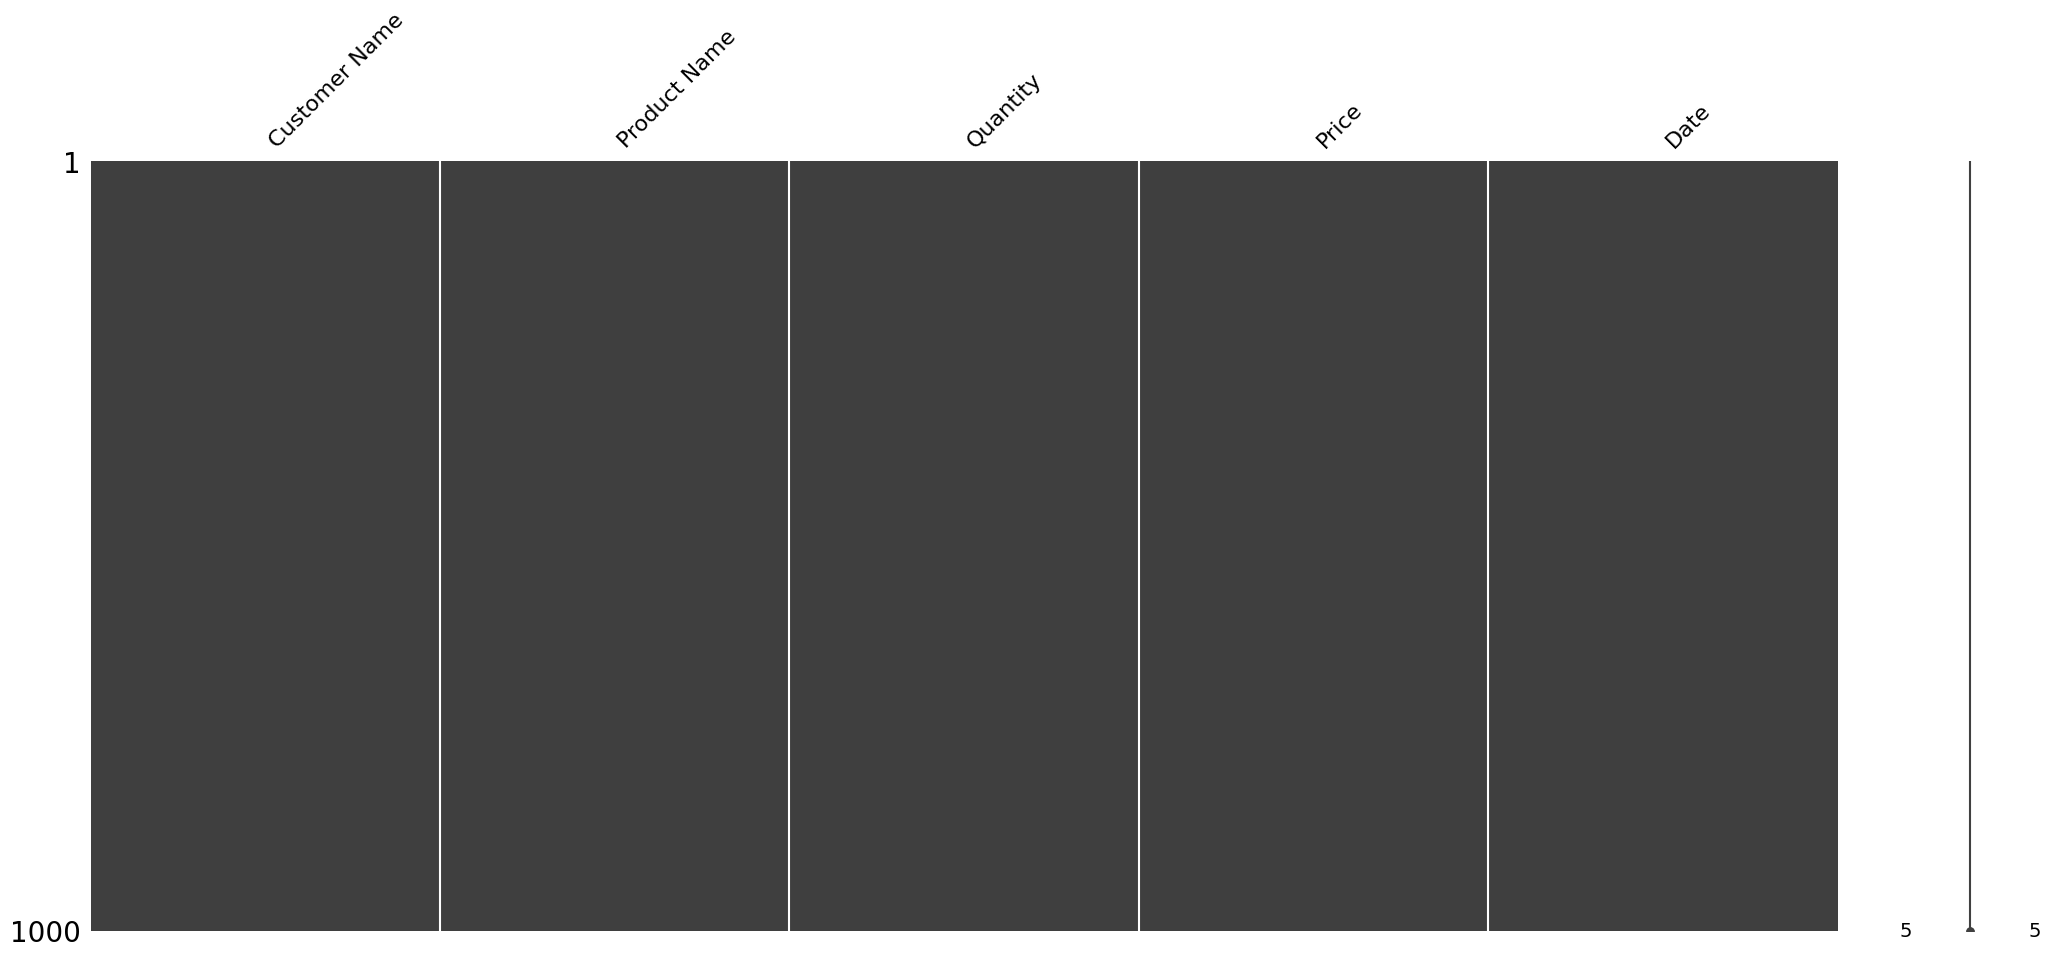

In [18]:
import missingno as msno
msno.matrix(sales_df)

In [19]:
sales_df.columns

Index(['Customer Name', 'Product Name', 'Quantity', 'Price', 'Date'], dtype='object')

In [20]:
sales_df.value_counts()

Customer Name   Product Name  Quantity  Price   Date      
Aaron Cross     anything      1         451.37  2023-03-30    1
Michelle Brown  everything    9         719.39  2023-07-18    1
Michael Reed    clearly       8         370.52  2023-03-07    1
Michael Romero  fly           7         790.49  2023-08-17    1
Michael Roy     not           1         119.79  2023-04-10    1
                                                             ..
Haley Butler    ground        9         635.87  2023-07-03    1
Hannah Tucker   environment   6         764.14  2023-10-12    1
Harry French    give          2         212.77  2023-05-06    1
Heather Bean    society       8         310.72  2023-06-21    1
Zoe King        so            3         418.49  2023-06-14    1
Name: count, Length: 1000, dtype: int64

In [21]:
sales_df.head()

,Customer Name,Product Name,Quantity,Price,Date
0,Alan Durham,really,2,622.66,2023-03-14
1,Stacey Pitts,ten,6,169.11,2023-06-30
2,Jason Weber,positive,4,532.59,2023-11-05
3,James Henderson,this,7,813.24,2023-07-17
4,Phillip May,energy,8,921.98,2023-10-09


In [22]:
# Data analysis and visualization
# Example: Plot total sales over time
sales_df['Date'] = pd.to_datetime(sales_df['Date'])
sales_df.set_index('Date', inplace=True)
monthly_sales = sales_df.resample('M').sum()

/tmp/ipykernel_18/362330020.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = sales_df.resample('M').sum()


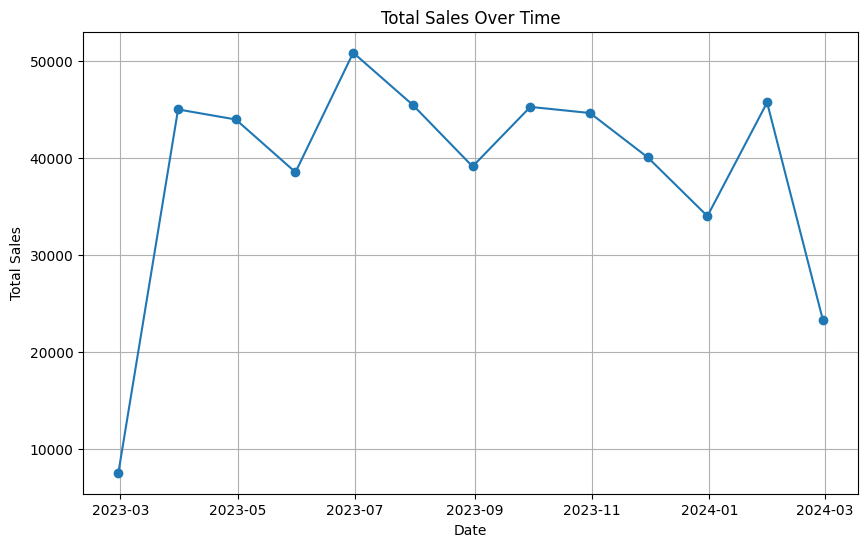

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales['Price'], marker='o', linestyle='-')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# Customer DataFrame

In [24]:
customer_df.head()

,Customer Name,Age,Gender,Email,Address
0,Angelica Clark,25,Male,garciacharles@example.org,"154 Luna Stream Apt. 049\nWest Pamela, VI 04137"
1,Jean Colon,51,Female,hutchinsonchristina@example.org,Unit 8715 Box 0095\nDPO AP 97623
2,Benjamin Robinson,58,Female,dana39@example.com,"404 Mccullough Harbor Apt. 908\nWest Amy, IA 2..."
3,Brandi Lloyd,22,Female,wrightchloe@example.net,7974 Hickman Street Suite 812\nEast Brucechest...
4,Tiffany Jackson,21,Female,wgiles@example.net,"7457 Smith Burg\nMurphyville, TN 96151"


In [25]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Customer Name  200 non-null    object
 1   Age            200 non-null    int64 
 2   Gender         200 non-null    object
 3   Email          200 non-null    object
 4   Address        200 non-null    object
dtypes: int64(1), object(4)
memory usage: 7.9+ KB


In [26]:
customer_df.shape

(200, 5)

In [27]:
customer_df.describe()

,Age
count,200.000000
mean,43.050000
std,15.582412
min,18.000000
25%,29.000000
50%,42.500000
75%,56.000000
max,70.000000


In [28]:
customer_df.describe(include = "all")

,Customer Name,Age,Gender,Email,Address
count,200,200.000000,200,200,200
unique,200,NaN,2,200,200
top,Angelica Clark,NaN,Male,garciacharles@example.org,"154 Luna Stream Apt. 049\nWest Pamela, VI 04137"
freq,1,NaN,106,1,1
mean,NaN,43.050000,NaN,NaN,NaN
std,NaN,15.582412,NaN,NaN,NaN
min,NaN,18.000000,NaN,NaN,NaN
25%,NaN,29.000000,NaN,NaN,NaN
50%,NaN,42.500000,NaN,NaN,NaN
75%,NaN,56.000000,NaN,NaN,NaN


In [29]:
customer_df.value_counts()

Customer Name      Age  Gender  Email                        Address                                                 
Alex Jackson       41   Male    tonyferguson@example.org     USS Smith\nFPO AA 37002                                     1
Michele Hansen     44   Female  david81@example.com          Unit 3116 Box 4932\nDPO AP 27200                            1
Matthew Gray       52   Female  zgrant@example.com           0079 Russell Plain\nCooperstad, NE 44898                    1
Matthew Sullivan   49   Male    grich@example.com            7898 Angela Ways Suite 794\nWilliefort, ID 67099            1
Meagan Carpenter   61   Male    gchan@example.net            27611 Banks Flats\nMckenzieport, AK 81031                   1
                                                                                                                        ..
Elizabeth Gray     28   Female  martinstephanie@example.org  Unit 9237 Box 7430\nDPO AE 02921                            1
Elizabeth Hawkins  67

In [30]:
customer_df.isnull().sum()

Customer Name    0
Age              0
Gender           0
Email            0
Address          0
dtype: int64

<Axes: >

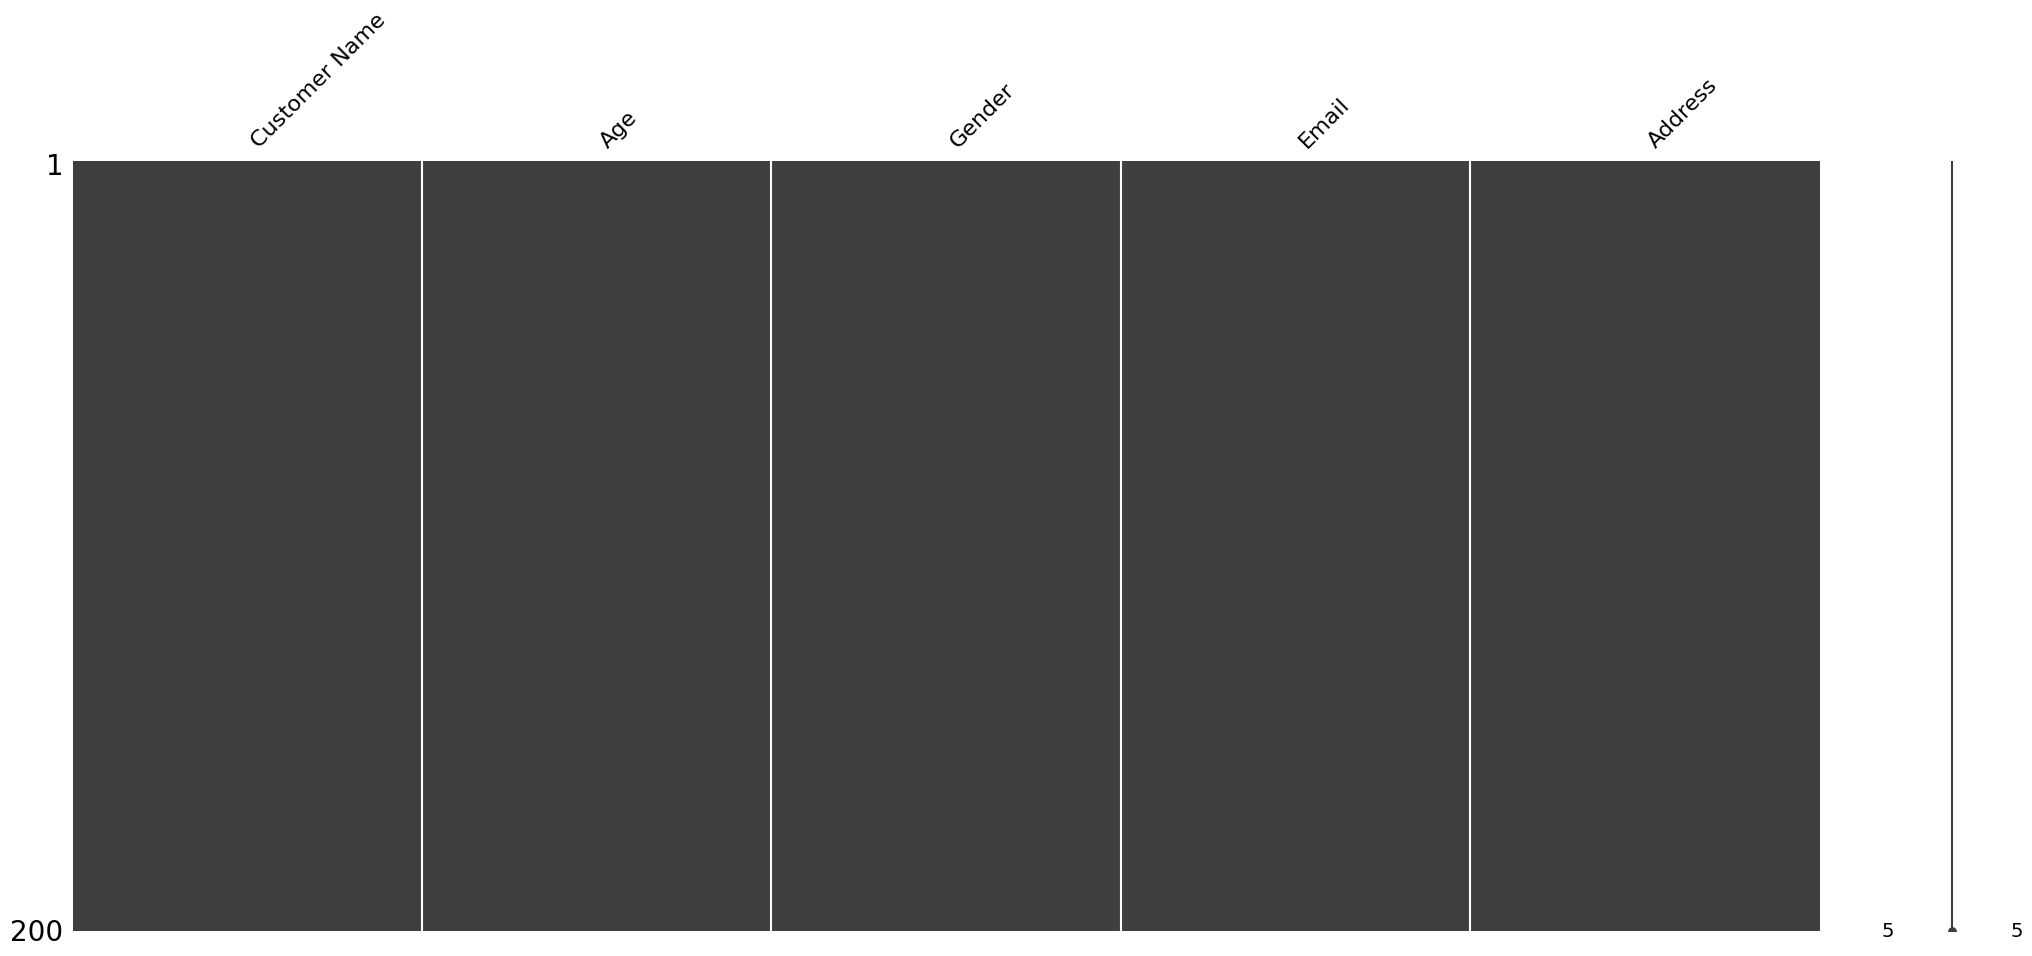

In [31]:
msno.matrix(customer_df)

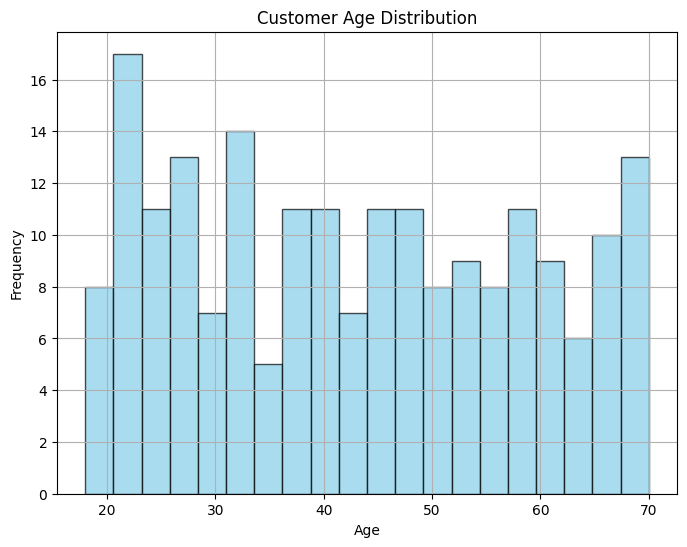

In [32]:
# Example: Customer age distribution
plt.figure(figsize=(8, 6))
plt.hist(customer_df['Age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Product Dataframe

In [33]:
product_df.head()

,Product Name,Category,Price
0,form,population,394.19
1,seem,smile,889.83
2,can,week,135.21
3,other,ahead,983.57
4,war,chair,715.01


In [34]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product Name  50 non-null     object 
 1   Category      50 non-null     object 
 2   Price         50 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [35]:
product_df.describe(include = "all")

,Product Name,Category,Price
count,50,50,50.000000
unique,49,48,NaN
top,end,purpose,NaN
freq,2,2,NaN
mean,NaN,NaN,494.131400
std,NaN,NaN,313.341336
min,NaN,NaN,21.720000
25%,NaN,NaN,205.952500
50%,NaN,NaN,401.215000
75%,NaN,NaN,813.085000


In [36]:
product_df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product Name,50,49,end,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,50,48,purpose,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,50.0,NaN,NaN,NaN,494.1314,313.341336,21.72,205.9525,401.215,813.085,998.25


<Axes: >

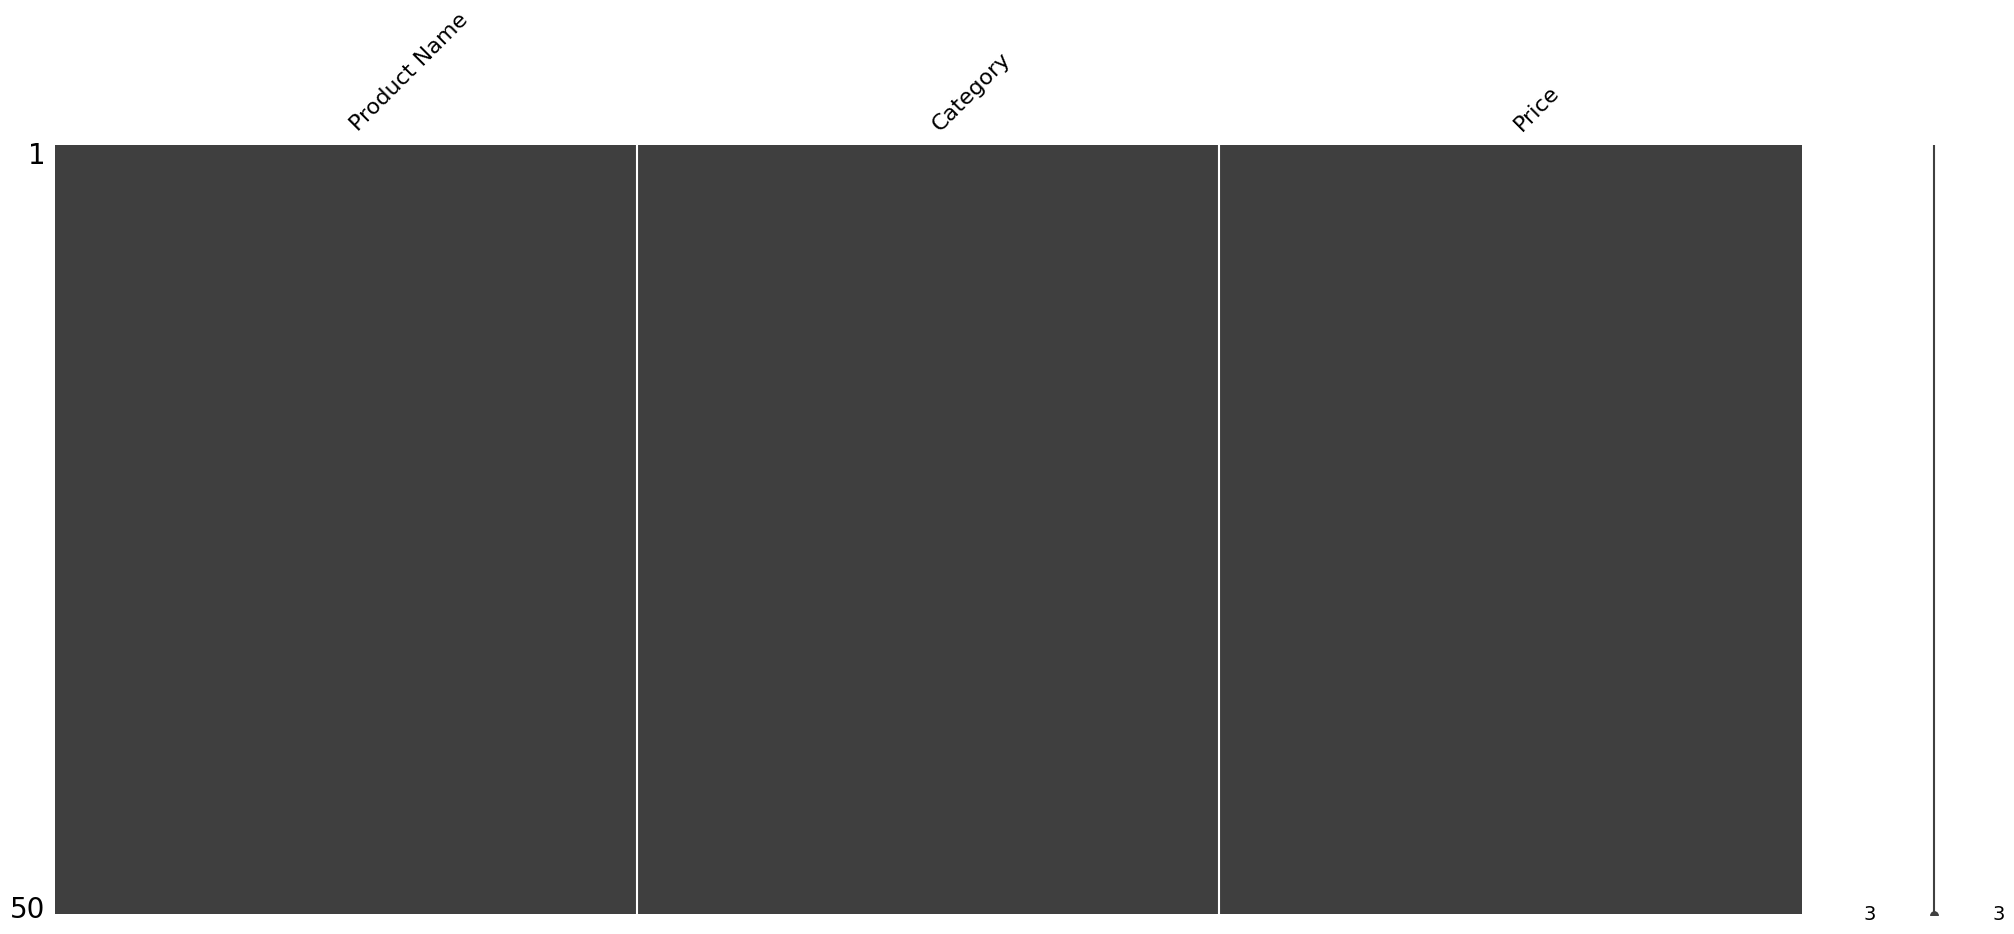

In [37]:
msno.matrix(product_df)

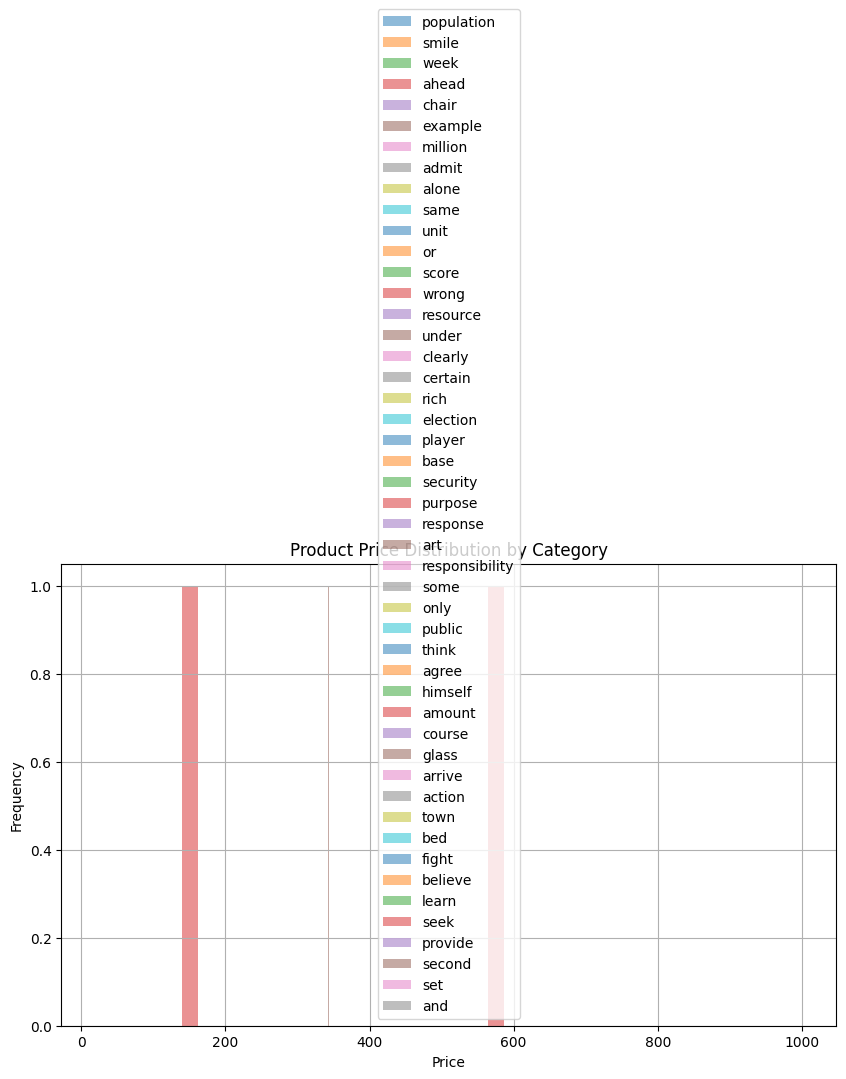

In [38]:
# Example: Product price distribution by category
plt.figure(figsize=(10, 6))
for category in product_df['Category'].unique():
    prices = product_df[product_df['Category'] == category]['Price']
    plt.hist(prices, bins=20, alpha=0.5, label=category)

plt.title('Product Price Distribution by Category')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Visualizations

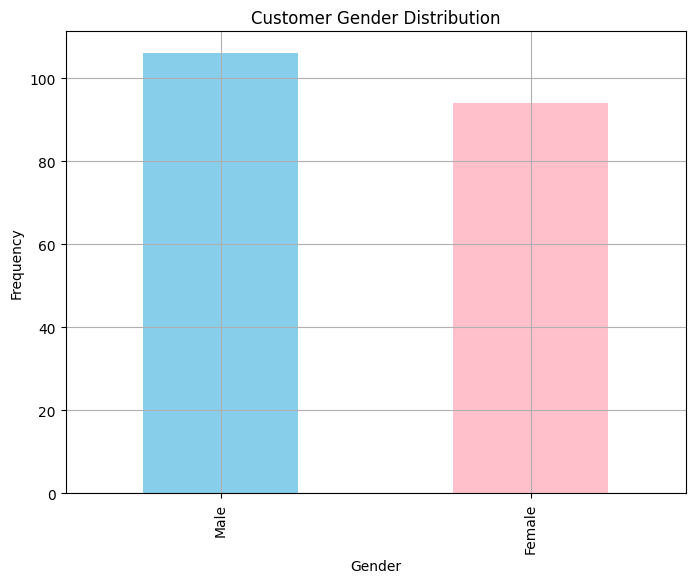

In [39]:
# Additional Analysis and Visualization

# Example: Customer Gender Distribution
plt.figure(figsize=(8, 6))
customer_df['Gender'].value_counts().plot(kind='bar', color=['skyblue', 'pink'])
plt.title('Customer Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

/tmp/ipykernel_18/2800054823.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_order_value = sales_df.resample('M')['Total Price'].mean()


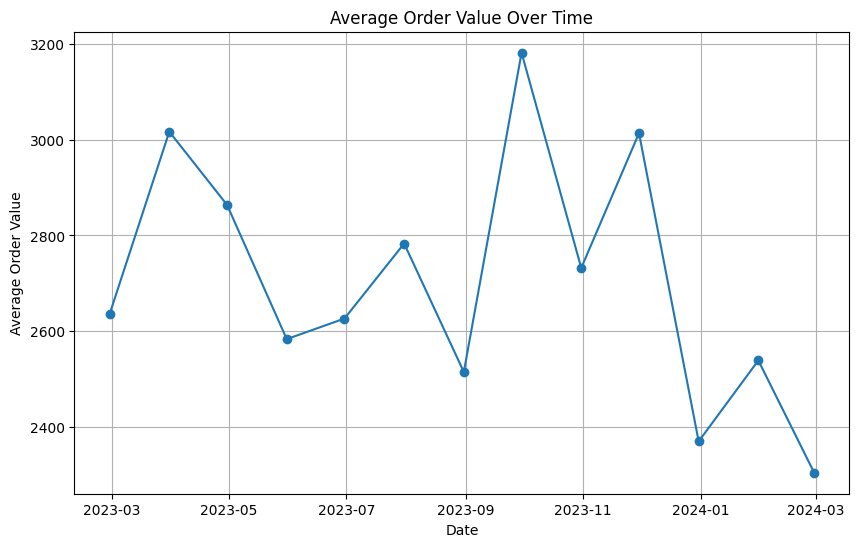

In [40]:
# Example: Customer Purchase Behavior - Average Order Value Over Time
sales_df['Total Price'] = sales_df['Quantity'] * sales_df['Price']
monthly_avg_order_value = sales_df.resample('M')['Total Price'].mean()

plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_order_value.index, monthly_avg_order_value.values, marker='o', linestyle='-')
plt.title('Average Order Value Over Time')
plt.xlabel('Date')
plt.ylabel('Average Order Value')
plt.grid(True)
plt.show()

In [41]:
# Example: Market Basket Analysis - Association Rules
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Sincerely, Dr. Eslam Fouad.